# Рынок недвижимости в России
В данном ноутбуке будут проанализированы данные о рынке недвижимости в России за последние 5-7 лет. Данные взяты из открытых источников:
[СберИндекс](https://sberindex.ru/ru/dashboards?partition=7)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
import seaborn as sns

%matplotlib inline

Проанализируем сначала динамику цен по фактическим сделкам на первичном рынке по месяцам в каждом регионе и по России в целом. 

In [3]:
import chardet
 
with open('Price_dynamics_for_actual_transactions_primary_market.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
rprices_pm = pd.read_csv('Price_dynamics_for_actual_transactions_primary_market.csv', delimiter=';', header=0, names=['date', 'region', 'rprice'], parse_dates=['date'], encoding=result['encoding'])

rprices_pm.head()

,date,region,rprice
0,2023-12-31,Россия,148396
1,2023-12-31,Ярославская область,101634
2,2023-12-31,Ямало-Ненецкий автономный округ,158592
3,2023-12-31,Чувашская Республика,100458
4,2023-12-31,Челябинская область,94797


In [25]:
rprices_pm.shape

(7188, 3)

In [27]:
rprices_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7188 non-null   datetime64[ns]
 1   region  7188 non-null   object        
 2   rprice  7188 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 168.6+ KB


In [29]:
rprices_pm['rprice'].describe()

count      7188.000000
mean      67616.952282
std       33286.782293
min       27903.000000
25%       43709.250000
50%       56506.000000
75%       83046.500000
max      294745.000000
Name: rprice, dtype: float64

 Посмотрим, какой процент данных выходят за 5 и 95 перцентиль

In [80]:
val1 = rprices_pm.rprice.quantile(0.05)
val2 = rprices_pm.rprice.quantile(0.95)
print(val1, val2)

35785.45 131713.59999999998


In [86]:
v1 = rprices_pm[rprices_pm['rprice']>val1]
print(v1.shape[0]*100/rprices_pm.shape[0])

94.99165275459099


In [87]:
v2 = rprices_pm[rprices_pm['rprice']>val2]
print(v2.shape[0]*100/rprices_pm.shape[0]) 

5.008347245409015


## Вывод 1:
За пятый процентиль выходит 95% данных, за 95 перцентиль выходит 5% данных

Далее попробуем понять какому закону распределения отвечают наши данные. 
Это можно сделать несколькими способами, но для точности выводов я покажу два разных способа.
Первый, это построить график плотности распределения и визуально сделать вывод.
Второй, это найти закон распределения исходя из параметров данных.

Важно отметить, что СВ в нашем дата сете является непрерывной, так как может принимать любое значение из бесконечного набора чисел. Соответственно, данную информацию можно использовать при поиске закона распределения, это существенно облегчит задачу.

<function matplotlib.pyplot.show(close=None, block=None)>

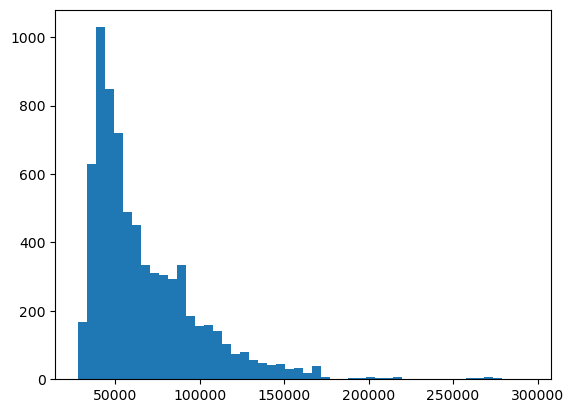

In [97]:
plt.hist(rprices_pm['rprice'], bins=50)
plt.show

Исходя из построенной гистограммы, можно предположить, что это либо экспоненциальное распределение, либо распределение Лапласа.
На последующих диаграммах попробуем убедиться в этом.

<Axes: ylabel='Density'>

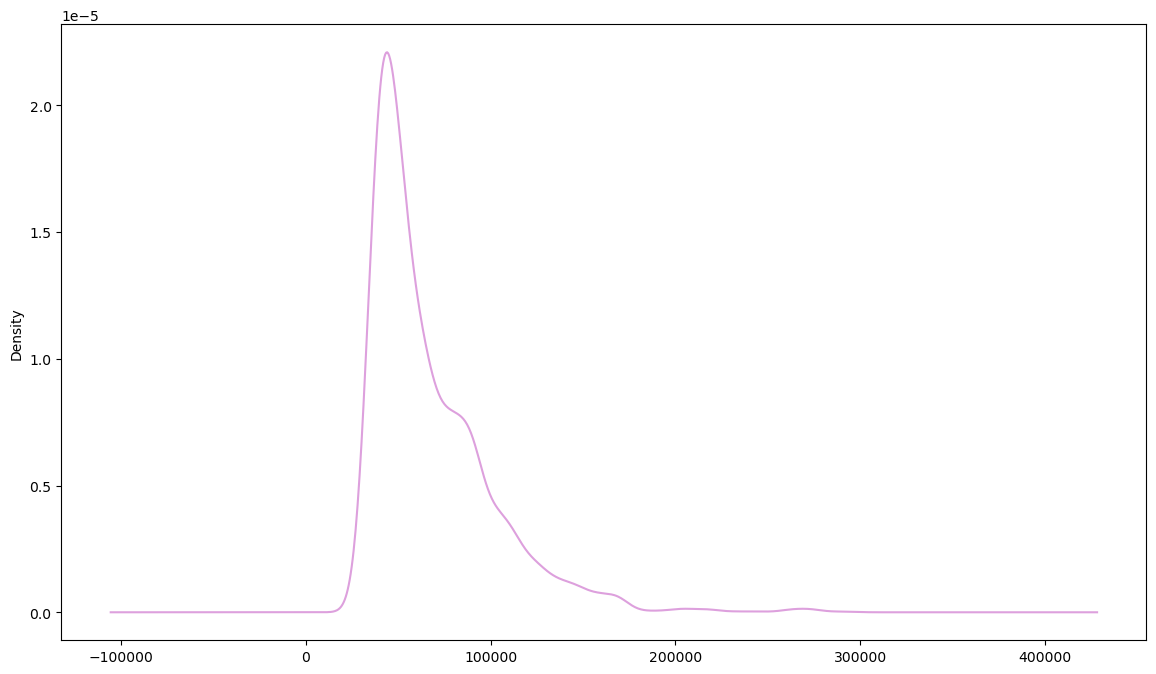

In [102]:
rprices_pm['rprice'].plot(kind='density', figsize=(14,8), color='plum')

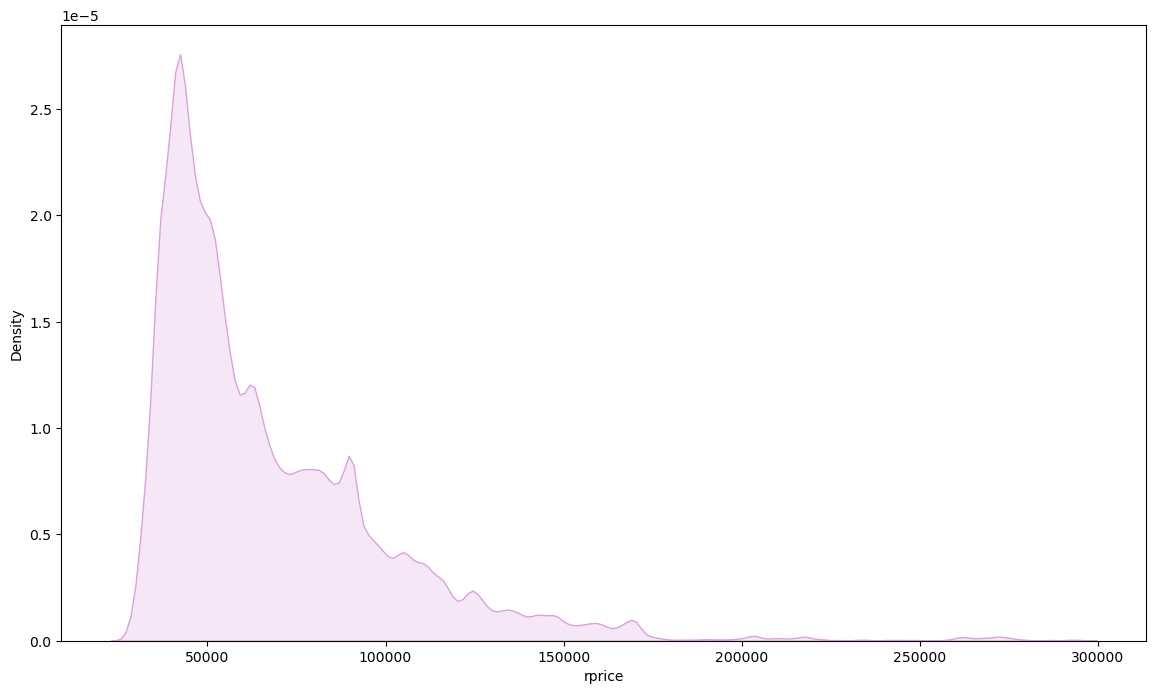

In [99]:
fig = plt.figure(figsize=(14, 8))
ax = sns.kdeplot(rprices_pm.rprice, fill=True, bw_adjust=.3, color='plum')

<Axes: xlabel='rprice', ylabel='Density'>

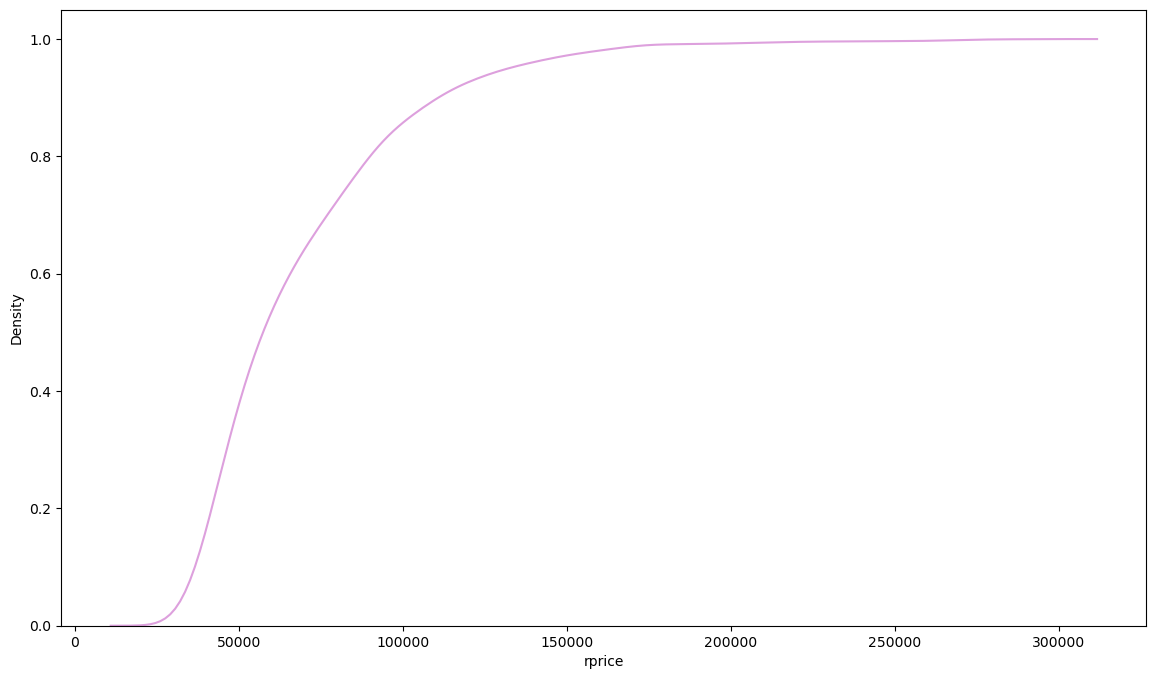

In [103]:
fig = plt.figure(figsize=(14, 8))
sns.kdeplot(rprices_pm.rprice, cumulative=True, color='plum')

Теперь попробуем определить распределение другим способом. Установим библиотеку, которая сравнивает каталог из 80 различных распределений с нашим распределением.

In [105]:
pip install fitter

Note: you may need to restart the kernel to use updated packages.


2024-01-31 14:21:24.084 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-31 14:21:25.759 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.0)
2024-01-31 14:21:27.838 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.0)
2024-01-31 14:21:28.805 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-01-31 14:21:29.477 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.0)
2024-01-31 14:21:29.988 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.0)
2024-01-31 14:21:30.107 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted burr12 distribution with error=0.0)
2024-01-31 14:21:30.238 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution wi

2024-01-31 14:22:32.086 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted genlogistic distribution with error=0.0)
2024-01-31 14:22:34.995 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted invgauss distribution with error=0.0)
2024-01-31 14:22:35.811 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted genpareto distribution with error=0.0)
2024-01-31 14:22:35.867 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED kstwo distribution (taking more than 30 seconds)
2024-01-31 14:22:36.362 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted invgamma distribution with error=0.0)
2024-01-31 14:22:36.460 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted laplace distribution with error=0.0)
2024-01-31 14:22:38.606 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted kstwobign distribution with error=0.0)
2024-01-31 14:22:39.098 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted laplac

2024-01-31 14:24:19.962 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED rel_breitwigner distribution (taking more than 30 seconds)
2024-01-31 14:24:26.937 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED rice distribution (taking more than 30 seconds)
2024-01-31 14:24:32.564 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED semicircular distribution (taking more than 30 seconds)
2024-01-31 14:24:35.586 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED skewcauchy distribution (taking more than 30 seconds)
2024-01-31 14:24:38.040 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED skewnorm distribution (taking more than 30 seconds)
2024-01-31 14:24:43.075 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED studentized_range distribution (taking more than 30 seconds)
2024-01-31 14:24:43.778 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED t distribution (taking more than 30 seco

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponnorm,9.908671e-11,2866.717469,2887.357974,inf,0.023226,8.431387e-04
laplace_asymmetric,1.351335e-10,2859.909892,2880.550397,inf,0.021744,2.200520e-03
geninvgauss,1.537242e-10,2848.603718,2876.124391,inf,0.030365,3.424741e-06
invweibull,1.558921e-10,2772.622302,2793.262806,inf,0.050293,3.061947e-16
exponweib,1.732569e-10,2807.843595,2835.364268,inf,0.047361,1.889979e-14


C:\Users\krivo\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


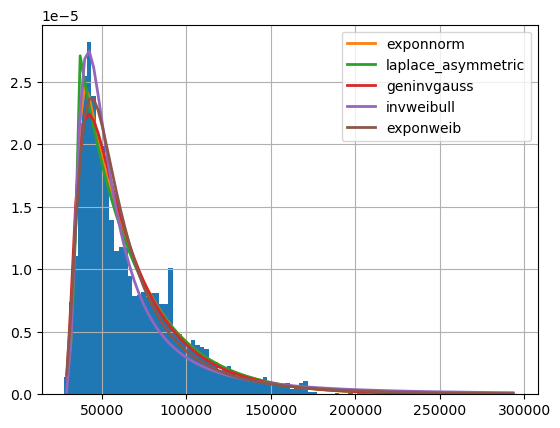

In [106]:
from fitter import Fitter
f = Fitter(rprices_pm['rprice'])
f.fit()
f.summary()

Данная библиотека имеет около 80 распределений, она сравнивает исходное распределение с основным каталогом и выводит 5 наиболее близких к нему распределений. В нашем случае, библиотека выдала exponnorm и laplace_assymetric. 
Это [экспоненциально модифицированное распределение Гаусса и](https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution) и [асимметричное распределение Лапласа (ALD)](https://en.wikipedia.org/wiki/Asymmetric_Laplace_distribution)

Исходя из графика, можно также убедиться в том, что экспоненциальное распределение больше всего подходит к дата-сету.

Такими способами можно определять законы распределения СВ, которая дана в конкретном дата-сете.

Взглянем на гистограмму, чтобы попробовать подтвердить гипотезу о том, что это одно из модификаций экспоненциального распределения.

<Axes: >

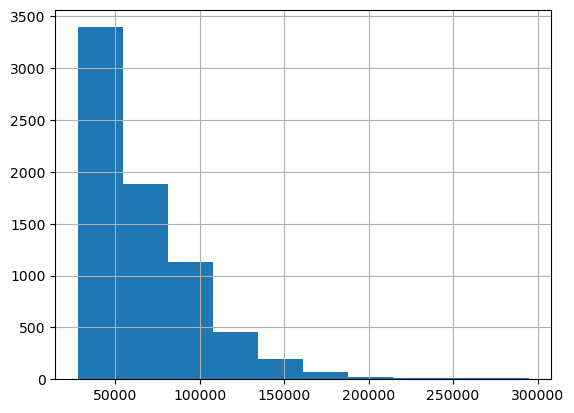

In [112]:
rprices_pm['rprice'].hist()

Избавимся от выбросов и посмотрим на гистограмму снова.

<Axes: >

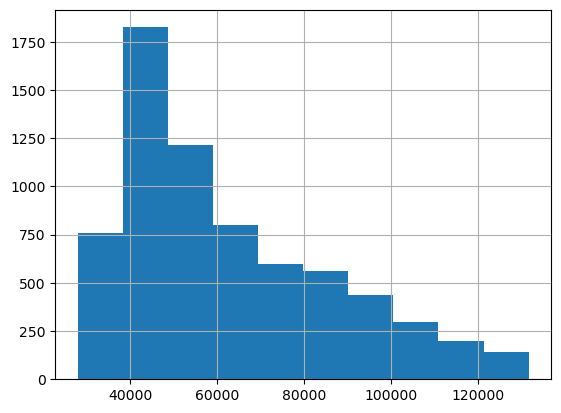

In [32]:
rprices_pm[rprices_pm.rprice<rprices_pm.rprice.quantile(0.95)]['rprice'].hist()

Исходя из полученных результатов, я предположу, что данные распределены по экспоненциально модифицированному распределению Гаусса.

Рассмотрим как менялись цены по фактическим сделкам на первичном рынке по дням в нескольких регионах отдельно.

In [4]:
rprices_pm.head()

,date,region,rprice
0,2023-12-31,Россия,148396
1,2023-12-31,Ярославская область,101634
2,2023-12-31,Ямало-Ненецкий автономный округ,158592
3,2023-12-31,Чувашская Республика,100458
4,2023-12-31,Челябинская область,94797


In [5]:
rprices_pm_ast = rprices_pm.loc[rprices_pm['region'] == 'Астраханская область'].sort_values(by=['date'])
rprices_pm_ast

,date,region,rprice
6853,2016-01-31,Астраханская область,43070
6780,2016-02-29,Астраханская область,42657
6666,2016-03-31,Астраханская область,42513
7072,2016-04-30,Астраханская область,41581
6997,2016-05-31,Астраханская область,43163
...,...,...,...
692,2023-08-31,Астраханская область,122138
618,2023-09-30,Астраханская область,124232
544,2023-10-31,Астраханская область,128515
144,2023-11-30,Астраханская область,126756


<Axes: title={'center': 'Динамика цен по фактическим сделкам в Астраханской области'}, xlabel='Дата', ylabel='Цена за квадратный метр'>

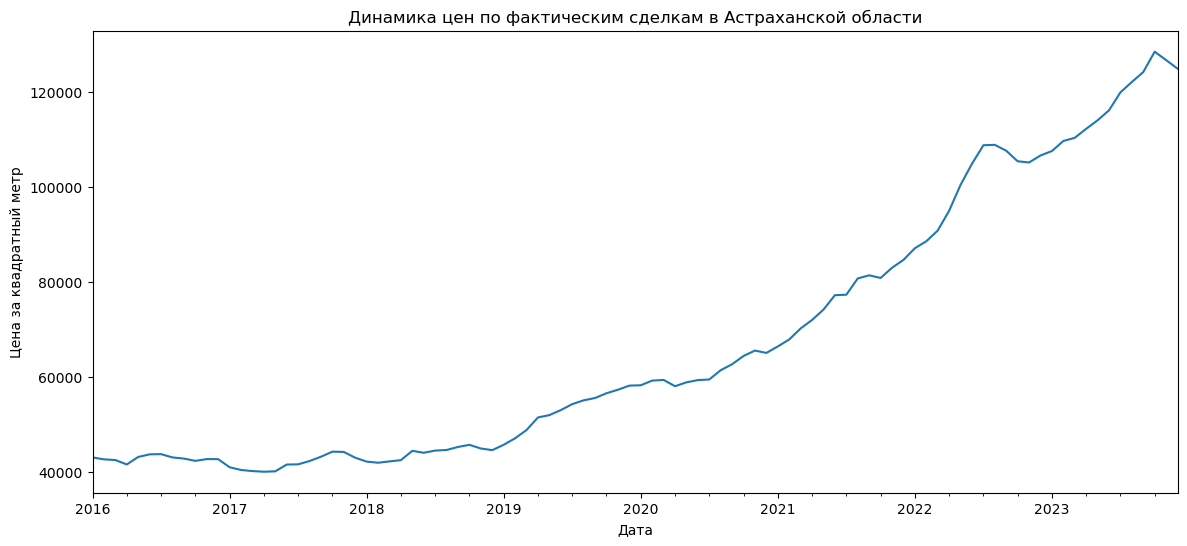

In [15]:
rprices_pm_ast.plot(x='date', y='rprice', kind='line', figsize=(14,6), title='Динамика цен по фактическим сделкам в Астраханской области', legend=False, xlabel='Дата', ylabel='Цена за квадратный метр')

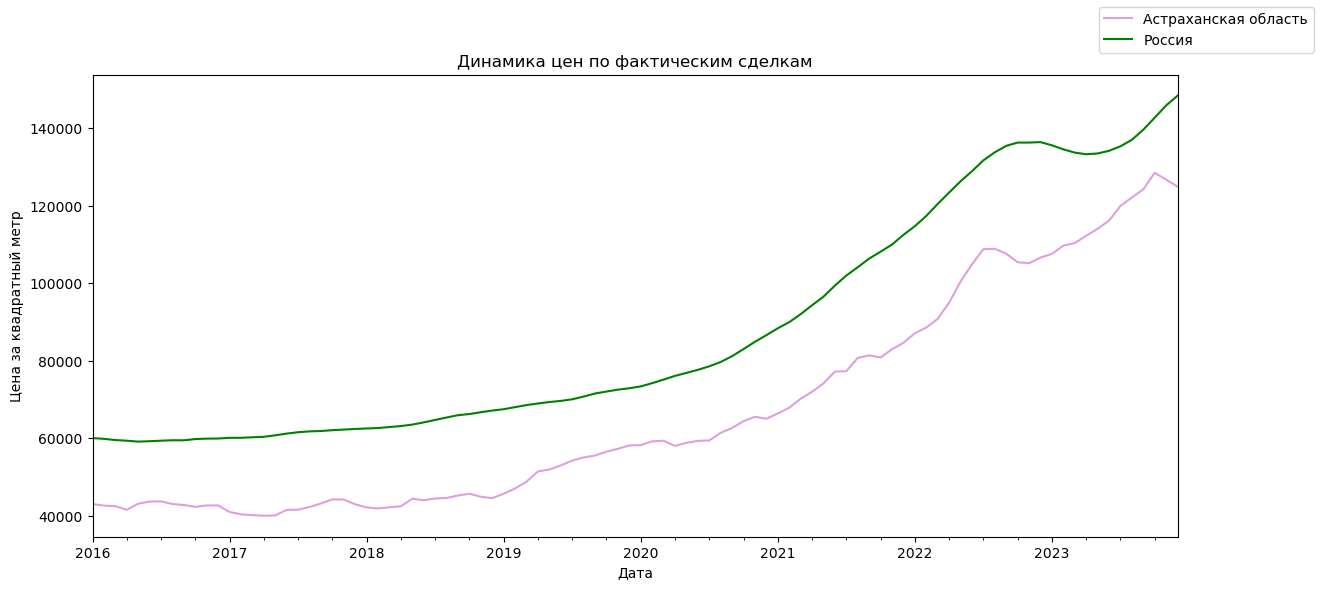

In [22]:
fig, ax = plt.subplots(figsize=(14, 6), sharex=True)
rprices_pm_rus = rprices_pm.loc[rprices_pm['region'] == 'Россия'].sort_values(by=['date'])
l1 = rprices_pm_ast.plot(x='date', y='rprice', kind='line', ax=ax, figsize=(14,6), legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='plum')
l2 = rprices_pm_rus.plot(x='date', y='rprice', kind='line', ax=ax, figsize=(14,6), legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='green')
ax.set_title('Динамика цен по фактическим сделкам')
fig.legend(labels=['Астраханская область','Россия'])

Данный график говорит нам о том, что в 2022 году в Астраханской области был сильный рост цен на недвижимость (в целом, как и по всей России), более резкий скачок цен был приблизительно в середине 2022 года, в то время как скачок в усредненных значениях по всей России был чуть позже. Сравним теперь изменения цен с другими регионами.

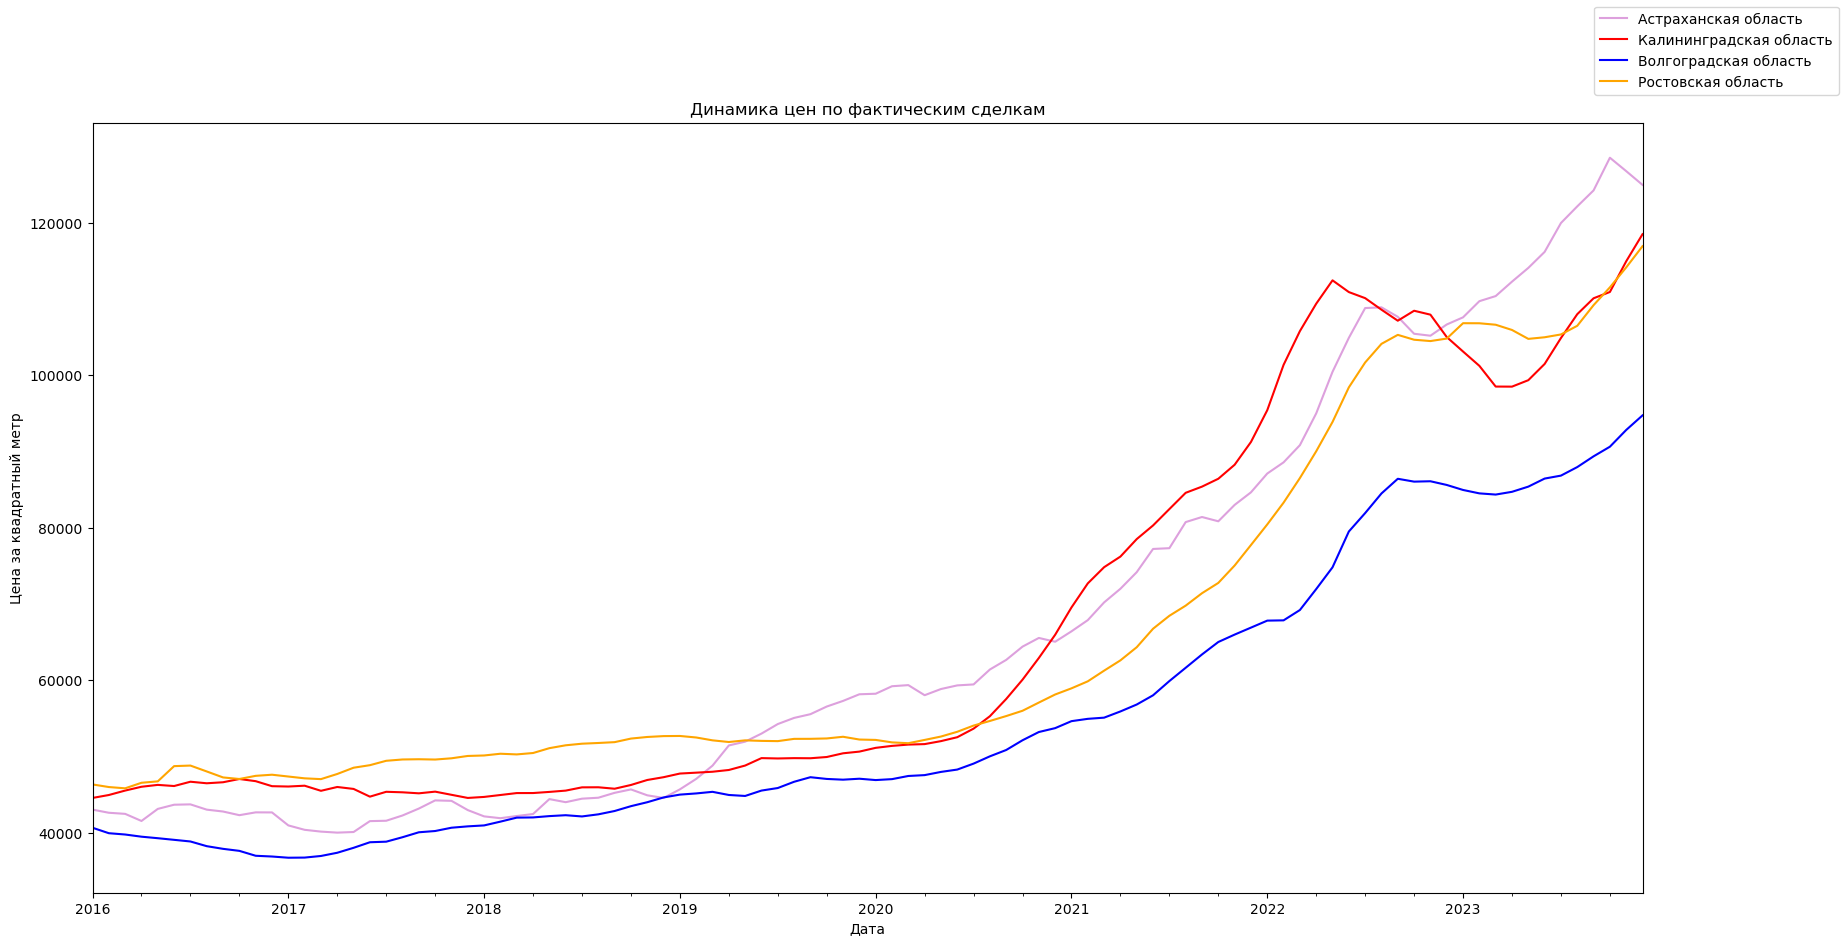

In [24]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
rprices_pm_kal = rprices_pm.loc[rprices_pm['region'] == 'Калининградская область'].sort_values(by=['date'])
rprices_pm_vol = rprices_pm.loc[rprices_pm['region'] == 'Волгоградская область'].sort_values(by=['date'])
rprices_pm_ros = rprices_pm.loc[rprices_pm['region'] == 'Ростовская область'].sort_values(by=['date'])

l1 = rprices_pm_ast.plot(x='date', y='rprice', kind='line', ax=ax, legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='plum')
l2 = rprices_pm_kal.plot(x='date', y='rprice', kind='line', ax=ax, legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='red')
l3 = rprices_pm_vol.plot(x='date', y='rprice', kind='line', ax=ax, legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='blue')
l4 = rprices_pm_ros.plot(x='date', y='rprice', kind='line', ax=ax, legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='orange')
ax.set_title('Динамика цен по фактическим сделкам')
fig.legend(labels=['Астраханская область','Калининградская область', 'Волгоградская область', 'Ростовская область'])

Что интересно, в Волгоградской области рост цен не такой значительный, как в остальных регионах, несмотря на то, что представленные регионы на графике относятся к одной географической области. В Калининграде же рост был самый быстрый и заметный в сравнении с остальными. Очевидно, что есть факторы, которые повлияли на такое различие.

Рассмотрим другие данные, которые имеются на СберИндексе. Это данные по фактическим сделкам на вторичном рынке, это данные по ценам объявлений на первичном и вторичном рынке и количество объявлений по рынке. Все эти данные можно между собой сравнивать и искать взаимосвязи.

In [6]:
with open('Price_dynamics_for_actual_transactions_secondary_market.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
rprices_sm = pd.read_csv('Price_dynamics_for_actual_transactions_secondary_market.csv', delimiter=';', header=0, names=['date', 'region', 'rprice'], parse_dates=['date'], encoding=result['encoding'])

rprices_sm.head()

,date,region,rprice
0,2023-12-31,Республика Башкортостан,79955
1,2023-12-31,Республика Алтай,117025
2,2023-12-31,Республика Адыгея,88261
3,2023-12-31,Псковская область,70288
4,2023-12-31,Приморский край,125526


In [7]:
with open('Price_dynamics_of_ads_primary_market.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
aprices_pm = pd.read_csv('Price_dynamics_of_ads_primary_market.csv', delimiter=';', header=0, names=['date', 'region', 'aprice'], parse_dates=['date'], encoding=result['encoding'])

aprices_pm.head()

,date,region,aprice
0,2023-11-01,Костромская область,85983.1
1,2023-11-01,Республика Саха (Якутия),141633.0
2,2023-11-01,Чувашская Республика,110231.0
3,2023-11-01,Хабаровский край,147809.0
4,2023-11-01,Московская область,193898.0


In [8]:
with open('Price_dynamics_of_ads_secondary_market.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
aprices_sm = pd.read_csv('Price_dynamics_of_ads_secondary_market.csv', delimiter=';', header=0, names=['date', 'region', 'aprice'], parse_dates=['date'], encoding=result['encoding'])

aprices_sm.head()

,date,region,aprice
0,2023-12-01,Самарская область,100000.0
1,2023-12-01,Ростовская область,111635.0
2,2023-12-01,Тамбовская область,85468.8
3,2023-12-01,Республика Коми,88302.5
4,2023-12-01,Республика Марий Эл,84054.2


In [9]:
with open('Offers_of_primary_real_estate.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
offers_pm = pd.read_csv('Offers_of_primary_real_estate.csv', delimiter=';', header=0, names=['date', 'region', 'offers'], parse_dates=['date'], encoding=result['encoding'])

offers_pm.head()

,date,region,offers
0,2023-12-01,Республика Алтай,8
1,2023-12-01,Белгородская область,521
2,2023-12-01,Новгородская область,420
3,2023-12-01,Ставропольский край,2796
4,2023-12-01,Амурская область,604


In [10]:
with open('Offers_of_secondary_real_estate.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
offers_sm = pd.read_csv('Offers_of_secondary_real_estate.csv', delimiter=';', header=0, names=['date', 'region', 'offers'], parse_dates=['date'], encoding=result['encoding'])

offers_sm.head()

,date,region,offers
0,2023-12-01,Кемеровская область,9185
1,2023-12-01,Республика Бурятия,2246
2,2023-12-01,Новосибирская область,13014
3,2023-12-01,Республика Саха (Якутия),3344
4,2023-12-01,Чеченская Республика,487


In [25]:
with open('The_period_of_exposure_of_secondary_real_estate.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
exposure_sm = pd.read_csv('The_period_of_exposure_of_secondary_real_estate.csv', delimiter=';', header=0, names=['date', 'region', 'period'], parse_dates=['date'], encoding=result['encoding'])

exposure_sm.head()

,date,region,period
0,2023-12-01,Республика Алтай,57.2254
1,2023-12-01,Республика Татарстан,58.1997
2,2023-12-01,Ленинградская область,95.3276
3,2023-12-01,Республика Саха (Якутия),59.9589
4,2023-12-01,Удмуртская Республика,57.0260


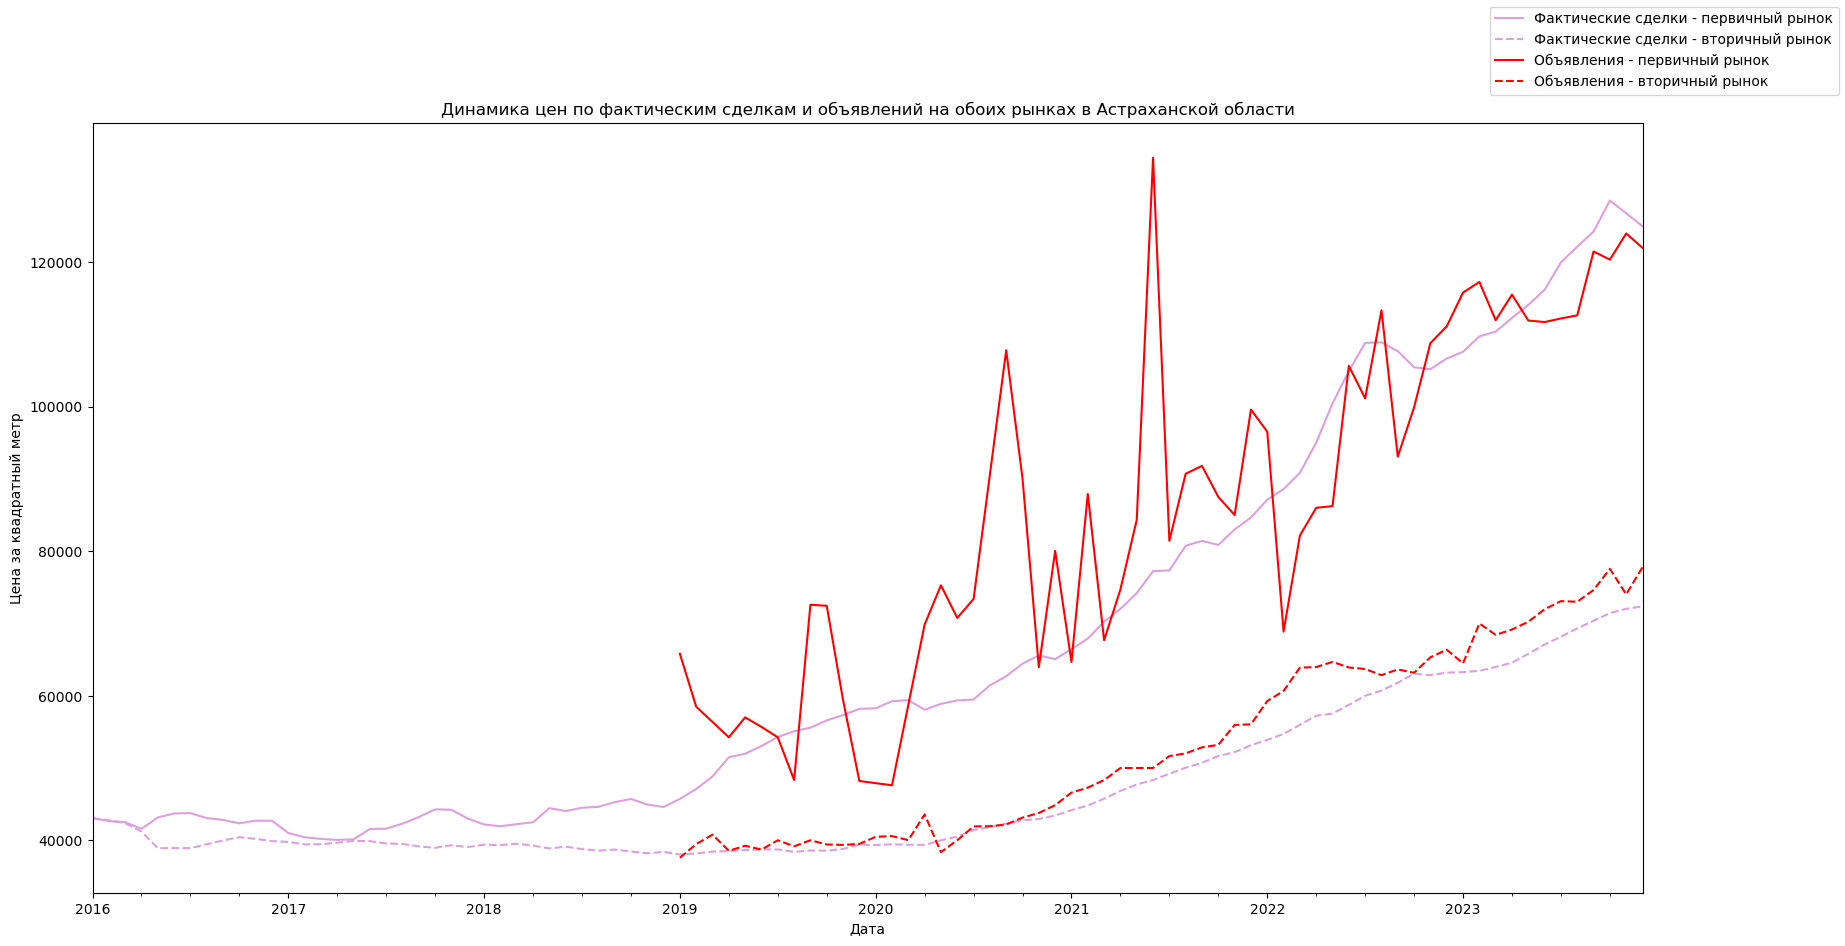

In [20]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
l1 = rprices_pm_ast.plot(x='date', y='rprice', kind='line', ax=ax, legend=False, xlabel='Дата', ylabel='Цена за квадратный метр', color='plum')
l2 = rprices_sm.loc[rprices_sm['region'] == 'Астраханская область'].sort_values(by=['date']).plot(x='date', y='rprice', kind='line', ax=ax, legend=False, style=['--'], xlabel='Дата', ylabel='Цена за квадратный метр', color='plum')
l3 = aprices_pm.loc[aprices_pm['region'] == 'Астраханская область'].sort_values(by=['date']).plot(x='date', y='aprice', kind='line', ax=ax, legend=False, style=['-'], xlabel='Дата', ylabel='Цена за квадратный метр', color='red')
l4 = aprices_sm.loc[aprices_sm['region'] == 'Астраханская область'].sort_values(by=['date']).plot(x='date', y='aprice', kind='line', ax=ax, legend=False, style=['--'], xlabel='Дата', ylabel='Цена за квадратный метр', color='red')                                                                    
ax.set_title('Динамика цен по фактическим сделкам и объявлений на обоих рынках в Астраханской области')
fig.legend(labels=['Фактические сделки - первичный рынок','Фактические сделки - вторичный рынок', 'Объявления - первичный рынок', 'Объявления - вторичный рынок'])

На данном графике отсутствуют данные по объявлениям до 2019 года, что немного искажает общую картину, но тем не менее, первичный анализ возможно провести.

На представленном графике присутствуют данные по фактическим сделкам и объявлениям в Астраханской области и что интересно, в сентябре 2020 года и в июне 2021 года были резкие скачки в ценах именно по объявлениям.

Есть несколько факторов, которые повлияли на такое изменение.
- Во первых, в тот момент программа Льготной ипотеки действовала до 1 июля 2021 года и на фоне новостей о скором завершении программы льготной ипотеки произошел резкий скачок продаж — люди стремятся успеть совершить покупку по старым понятным и относительно доступным условиям. [РБК](https://realty.rbc.ru/news/604a1f6e9a7947b75a86705c)

- Во вторых, такое ускорение роста цен на недвижимость начиная с 2020 года было из-за значительного роста спроса на жилье, в частности из-за увеличения доступности ипотечных кредитов в условиях смягчения денежно-кредитной политики Банка России и действия льготных ипотечных программ, в первую очередь — «Программы 6,5%».

На вторичном рынке фактические сделки и объявления показывают очень схожую динамику и меньшую волатильность по сравнению с первичным рынком.

Если сравнивать динамику фактических сделок на первичном и вторичном рынке, то можно заметить, что на первичном рынке наблюдается большая волатильности и цена подвержена резким скачкам. 
Это происходит в большей степени из-за того, что волатильность связана с маржинальностью проекта, по которому ведется проектное финансирование. Новостройки строятся с учетом проектного финансирования банка и маржинальность, которая закладывается в проект прямо влияет на конечную цену потребителя.
Вторичный же рынок предполагает передпродажу недвижимости и не предполагает прямого проектного финансирования и строгой маржинальности, как в случае с финансовыми институтами.

Построим графики так же для срока экспозиции недвижимости на вторичном рынке в рассматриваемой области.

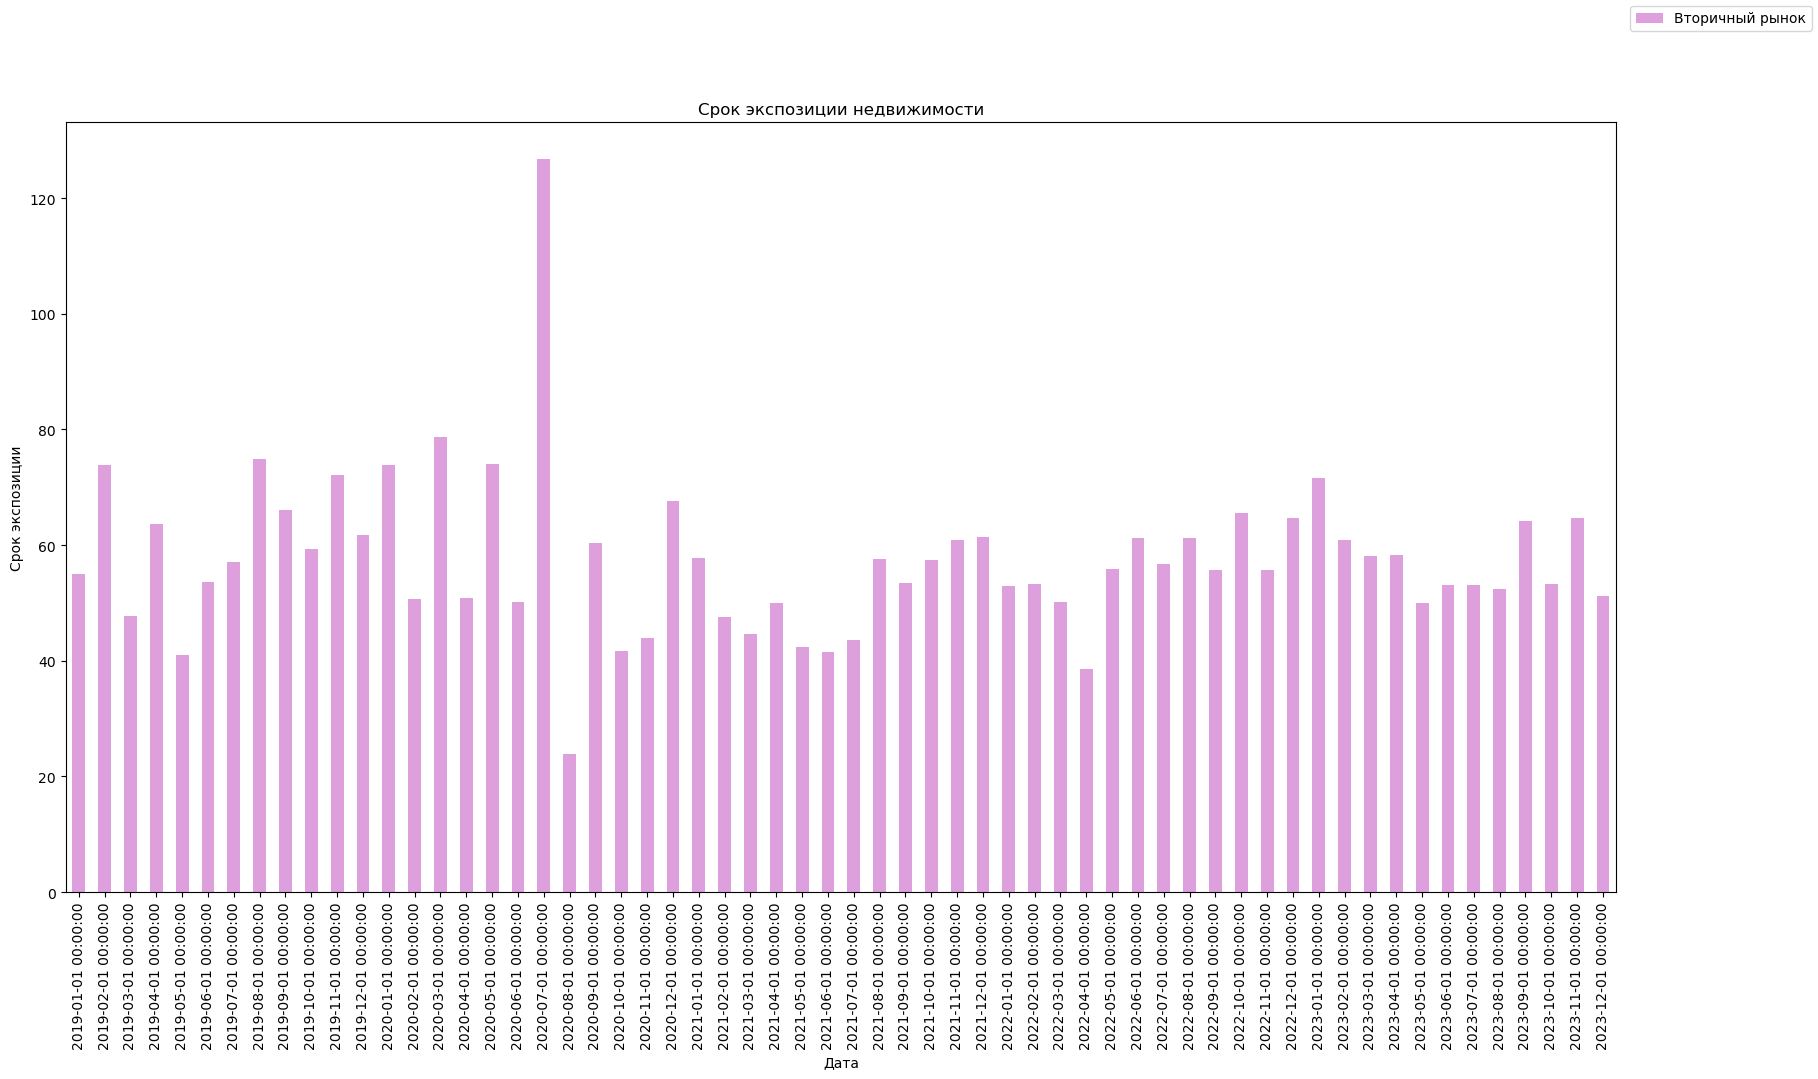

In [31]:
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
l5 = exposure_sm.loc[exposure_sm['region'] == 'Астраханская область'].sort_values(by=['date']).plot(x='date', y='period', kind='bar', ax=ax, legend=False, style=['-'], xlabel='Дата', ylabel='Срок экспозиции', color='plum')
ax.set_title('Срок экспозиции недвижимости')
fig.legend(labels=['Вторичный рынок'])

Примечательно, что в 2020 году срок экспозиции был очень высокий, это также связано с условиями по ипотечным кредитам.

Если говорить про текущую ситуацию на рынке недвижимости, то ожидается, что цены будут продолжать расти, в частности из-за того, что начиная с 1 июня 2023 года первоначальный взнос по ипотеке будет составлять не менее 20%, а с 1 января 2024 года — 30%.

[Банк России планирует уточнить макропруденциальные требования к ипотеке](https://cbr.ru/press/event/?id=14665)

Также планируется использовать инструмент продаж -- рассрочка, что будет завышать цену примерно на 5-10%